In [7]:
from typing import Callable, Optional
from helpsk.string import format_number
import matplotlib.pyplot as plt
import arviz as az

def plot_hdi(
        samples,
        title: Optional[str] = None,
        transformation: Optional[Callable] = None,
        vertical_factor_66: int = 1,
        vertical_factor_95: int = 1,
        ticks: Optional[list] = None,
        decimals: int = 1):
    """
    Plot the 66% and 95% Hight Density Interval of `samples` passed in. The min, median, and max
    is also plotted.

    Args:
        samples:
            np.array of integers or floats
        title:
            title of the plot
        transformation:
            transformation to do for displaying the min, median, max, and 66% and 95% low and high
            values for the HDI.
    """
    sim_min, sim_median, sim_max = np.quantile(samples, q=[0, 0.5, 1])
    sim_95_hdi_prob_low, sim_95_hdi_prob_hi = az.hdi(samples, hdi_prob=0.95)
    sim_66_hdi_prob_low, sim_66_hdi_prob_hi = az.hdi(samples, hdi_prob=0.66)

    def plot_text(x, label, above=True, factor=1):
        y = 0.018 + (0.025 * (factor - 1))
        if not above:
            y *= -1

        if transformation:
            x_formatted = format_number(transformation(x), places=decimals)
        else:
            x_formatted = format_number(x, places=decimals)

        return plt.text(
            x=x, y=y,
            s=f"{label}:\n{x_formatted}",
            ha='center', va='center', fontsize=9,
        )

    fig, ax = plt.subplots(1)
    plt.plot([sim_min, sim_max], [0, 0], color='gray')
    plt.plot([sim_95_hdi_prob_low, sim_95_hdi_prob_hi], [0, 0], color='black', linewidth=3)
    plt.plot([sim_66_hdi_prob_low, sim_66_hdi_prob_hi], [0, 0], color='black', linewidth=7)
    plt.plot(sim_median, 0, 'o', markersize=15, color='black')
    ax.set_yticklabels([])

    plot_text(x=sim_min, label='min')
    plot_text(x=sim_max, label="max")
    plot_text(x=sim_median, label="median", above=False)
    plot_text(x=sim_66_hdi_prob_low, label="HDI 66", factor=vertical_factor_66)
    plot_text(x=sim_66_hdi_prob_hi, label="HDI 66", factor=vertical_factor_66)
    plot_text(x=sim_95_hdi_prob_low, label="HDI 95", above=False, factor=vertical_factor_95)
    plot_text(x=sim_95_hdi_prob_hi, label="HDI 95", above=False, factor=vertical_factor_95)

    if ticks:
        plt.xticks(ticks)

    if transformation:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        for index in range(len(labels)):
            labels[index] = format_number(
                transformation(float(labels[index].replace('−', '-'))),
                places=decimals
            )
        ax.set_xticklabels(labels)

    fig.set_size_inches(w=7, h=2.2)
    # plt.xlim((115, 195))
    if not title:
        title = "HDI"
    plt.suptitle(title)


In [13]:
import numpy as np

random_draws = np.random.binomial(100, 0.1, size=10000)
random_draws[0:30]

array([10, 10,  4, 12, 14,  9,  6, 11,  8, 13, 12,  7, 17,  5,  7, 10, 11,
        9,  7, 11, 12,  8, 14,  4,  8, 13,  9, 10, 13,  7])

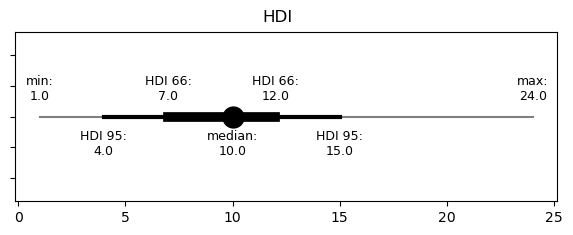

In [14]:
plot_hdi(random_draws)

In [16]:
import plotly_express as px

px.histogram(
    random_draws
)